In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [86]:
#Loading dataset
train_df = pd.read_csv("D:/SMS_Customer_Predict/input/train.csv")
test_df = pd.read_csv('D:/SMS_Customer_Predict/input/test.csv', index_col='id')

In [87]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [88]:
#Check missing values
def display_missing_values(df):
    for col in df:
        missing_count = df[col].isna().sum()
        if missing_count > 0:
            print(f"Col {col} having {missing_count} values")
    print("Don't have missing values")
display_missing_values(train_df)
display_missing_values(test_df)

Don't have missing values
Don't have missing values


### Feature Categorical and Numberical

In [89]:
#Numberical and Categorical
categorical_cols = train_df.select_dtypes(include=['object', 'category']).columns
numberical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
print(categorical_cols)
print(numberical_cols)

Index(['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn'], dtype='object')
Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'],
      dtype='object')


### Explortary Data Analyst (EDA)

##### Categorical Features 

In [90]:
train_df['area_code'].value_counts(normalize=True).to_frame()

,proportion
area_code,
area_code_415,0.496000
area_code_408,0.255529
area_code_510,0.248471


In [91]:
train_df['international_plan'].value_counts(normalize=True).to_frame()

,proportion
international_plan,
no,0.906824
yes,0.093176


In [92]:
train_df['voice_mail_plan'].value_counts(normalize=True).to_frame()

,proportion
voice_mail_plan,
no,0.738353
yes,0.261647


In [93]:
train_df

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,WV,73,area_code_408,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,NC,75,area_code_408,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no


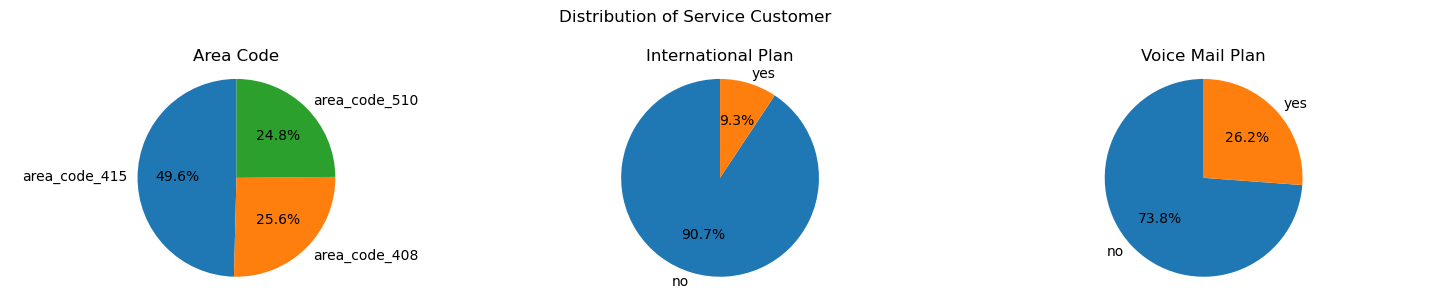

In [94]:
#Distribution of Customer Service 
fig, axs = plt.subplots(1,3,figsize=(15,3))
fig.suptitle('Distribution of Service Customer')

cols = ['area_code', 'international_plan', 'voice_mail_plan']
titles = ['Area Code', 'International Plan', 'Voice Mail Plan']

for i, col in enumerate(cols):
   data = train_df[col].value_counts(normalize=True)
   labels = data.index.astype(str) #Convert Series to String
   axs[i].pie(data, labels=labels, autopct='%1.1f%%', startangle=90)
   axs[i].set_title(titles[i])
   axs[i].axis('equal')

plt.tight_layout()
plt.show()
   

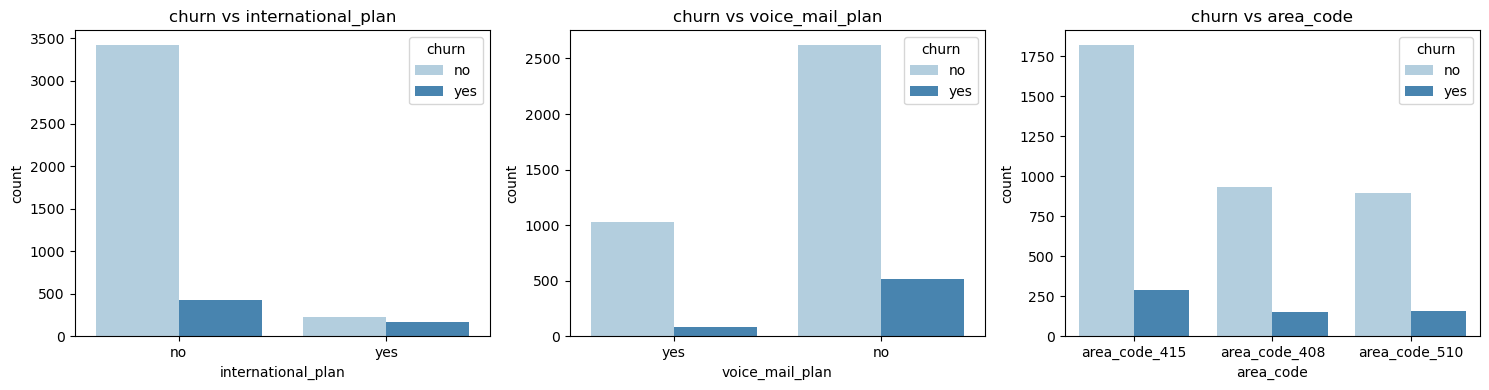

In [95]:
cols = ['international_plan', 'voice_mail_plan', 'area_code', 'churn']

n_rows = 1
n_cols = 3

fig, axs = plt.subplots(n_rows, n_cols, figsize=(15,4))

for i, col in enumerate(cols[:-1]): 
   sns.countplot(data=train_df, x=col, hue='churn', ax=axs[i], palette='Blues')
   axs[i].set_title(f"churn vs {col}")        
   
plt.tight_layout()
plt.show() 

Overral:
- Customers who leave the service are less likely to use voice mail plan and international plans

### EDA For Numberical Features 

`total_day_minutes`, `total_eve_minutes`, `total_night_minutes` 

In [96]:
train_df[['total_day_minutes', 'total_eve_minutes', 'total_night_minutes']].describe()

,total_day_minutes,total_eve_minutes,total_night_minutes
count,4250.000000,4250.000000,4250.000000
mean,180.259600,200.173906,200.527882
std,54.012373,50.249518,50.353548
min,0.000000,0.000000,0.000000
25%,143.325000,165.925000,167.225000
50%,180.450000,200.700000,200.450000
75%,216.200000,233.775000,234.700000
max,351.500000,359.300000,395.000000


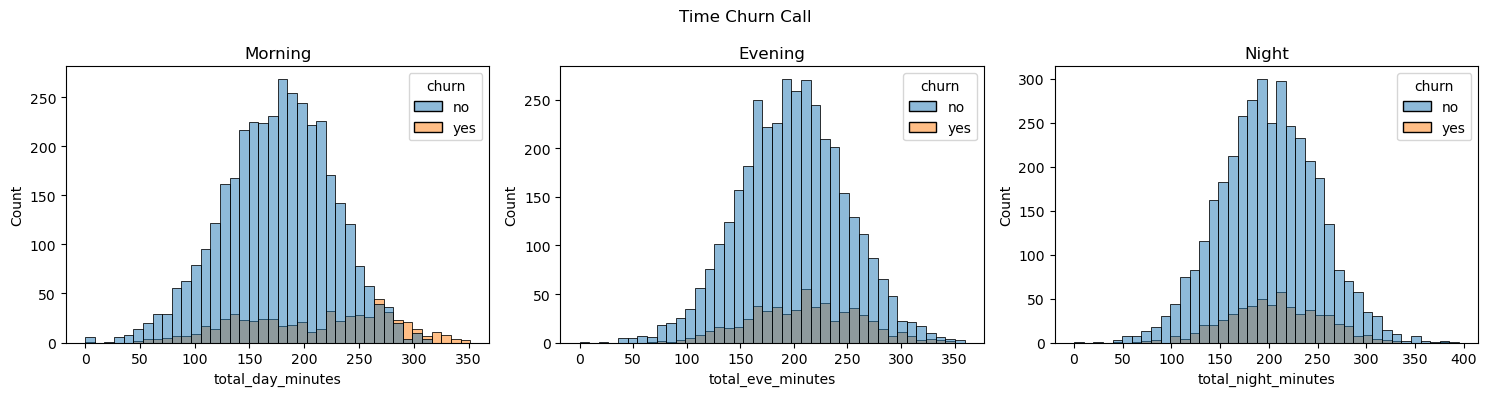

In [97]:
n_rows = 1
n_cols = 3

fig, axs = plt.subplots(n_rows, n_cols, figsize = (15, 4))
fig.suptitle('Time Churn Call')

cols = ['total_day_minutes', 'total_eve_minutes', 'total_night_minutes']
titles = ['Morning', 'Evening', 'Night']

for i, col in enumerate(cols):
   sns.histplot(data=train_df, x=col, hue='churn', ax=axs[i], bins=40)
   axs[i].set_title(titles[i])
   
plt.tight_layout()


- Majority churn yes spend 270 to 340 min to call in the morning

`total_day_calls`, `total_eve_calls`, `total_night_calls`

In [98]:
train_df[['total_day_calls', 'total_eve_calls', 'total_night_calls']].describe()

,total_day_calls,total_eve_calls,total_night_calls
count,4250.000000,4250.000000,4250.000000
mean,99.907294,100.176471,99.839529
std,19.850817,19.908591,20.093220
min,0.000000,0.000000,0.000000
25%,87.000000,87.000000,86.000000
50%,100.000000,100.000000,100.000000
75%,113.000000,114.000000,113.000000
max,165.000000,170.000000,175.000000


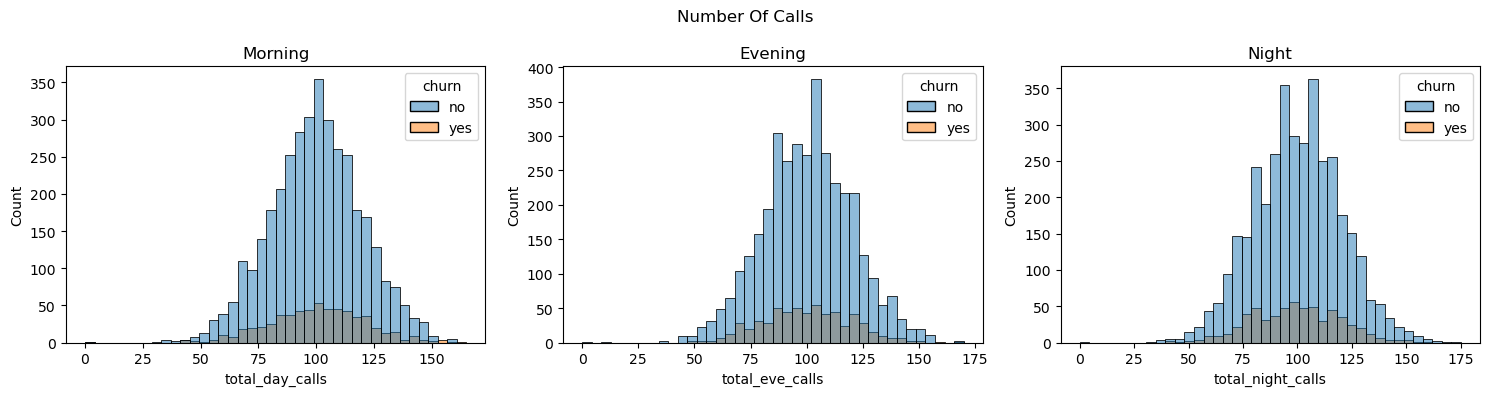

In [99]:
cols = ['total_day_calls', 'total_eve_calls', 'total_night_calls']
titles = ['Morning', 'Evening', 'Night']

fig, axs = plt.subplots(1,3,figsize=(15, 4))
fig.suptitle('Number Of Calls')

for i, col in enumerate(cols):
   sns.histplot(data=train_df, x=col, hue='churn', ax=axs[i], bins=40)
   axs[i].set_title(titles[i])

plt.tight_layout()

- There had been little to no custormer churn

`total_day_charge`, `total_eve_charge`, `total_night_charge`

In [100]:
train_df[['total_day_charge', 'total_eve_charge', 'total_night_charge']].describe()

,total_day_charge,total_eve_charge,total_night_charge
count,4250.000000,4250.000000,4250.000000
mean,30.644682,17.015012,9.023892
std,9.182096,4.271212,2.265922
min,0.000000,0.000000,0.000000
25%,24.365000,14.102500,7.522500
50%,30.680000,17.060000,9.020000
75%,36.750000,19.867500,10.560000
max,59.760000,30.540000,17.770000


In [101]:
train_df[['total_day_charge', 'total_eve_charge', 'total_night_charge']]

,total_day_charge,total_eve_charge,total_night_charge
0,27.47,16.62,11.45
1,41.38,10.30,7.32
2,50.90,5.26,8.86
3,28.34,12.61,8.41
4,37.09,29.62,9.57
...,...,...,...
4245,32.01,20.72,9.62
4246,30.24,11.15,8.38
4247,29.02,16.41,5.81
4248,40.07,18.96,13.39


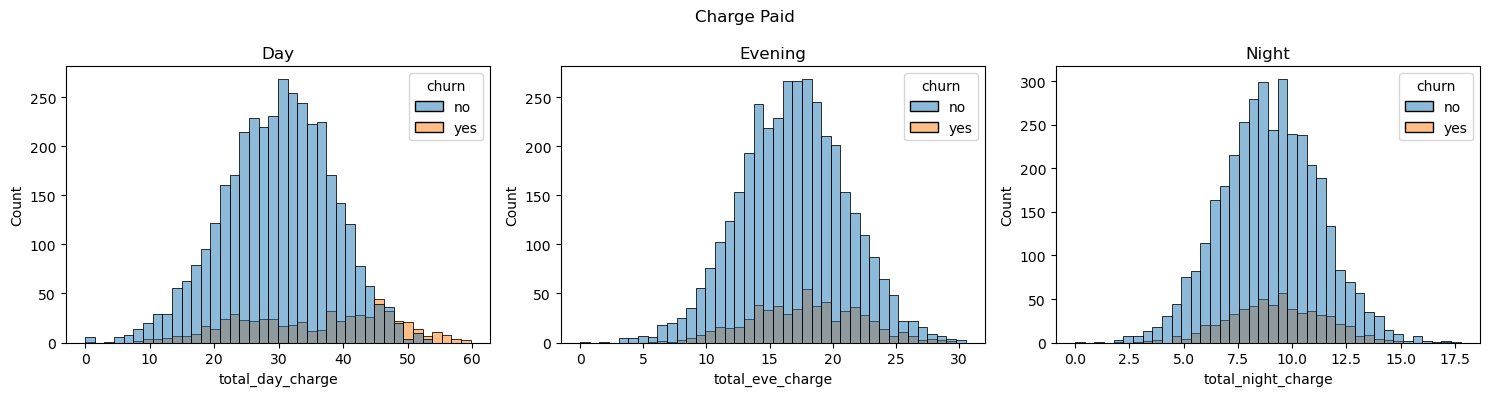

In [102]:
cols = ['total_day_charge', 'total_eve_charge', 'total_night_charge']
titles = ['Day', 'Evening', 'Night']

fig, axs = plt.subplots(1,3,figsize=(15,4))
fig.suptitle('Charge Paid')

for i, col in enumerate(cols):
   sns.histplot(data=train_df, x=col, hue='churn', bins=40, ax=axs[i])
   axs[i].set_title(titles[i])

plt.tight_layout()

In [103]:
minutes_categories = ['Short', 'Medium', 'Long']

<Axes: xlabel='total_day_charge', ylabel='count'>

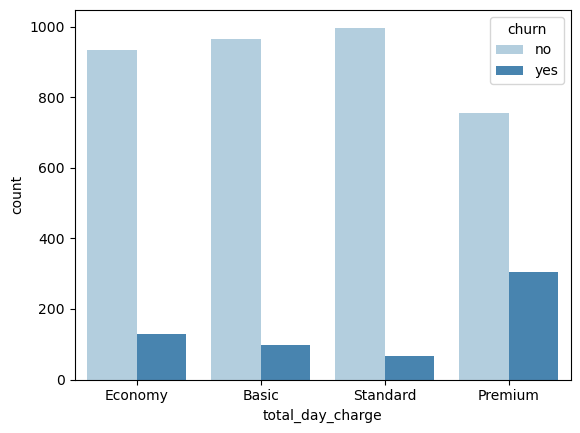

In [104]:
charge_categories = ['Economy', 'Basic', 'Standard', 'Premium'] #divide price into segments
quartile_data = pd.qcut(train_df['total_day_charge'], 4, labels=charge_categories)
sns.countplot(x=quartile_data, hue=train_df['churn'], palette='Blues')

- Almost churn yes paid more charge than in the morning 

`number_customer_service_calls`

In [105]:
train_df['number_customer_service_calls'].describe()

count    4250.000000
mean        1.559059
std         1.311434
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         9.000000
Name: number_customer_service_calls, dtype: float64

<Axes: xlabel='number_customer_service_calls', ylabel='Count'>

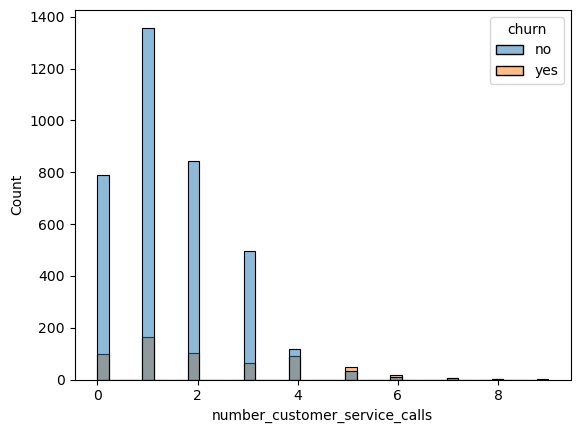

In [106]:
sns.histplot(data=train_df, x='number_customer_service_calls', hue='churn', bins=40)

### Overall

Almost customer leave service not use internaltion plan, voice mail plan. <br>
The group of customers at risk of leaving the service is the group of customers who use service in the morning 

### Feature Enginerring

In [107]:
def convert_to_binary(value):
   value = str(value).lower().strip()  # chuẩn hóa chuỗi
   if value == 'yes':
      return 1
   elif value == 'no':
      return 0
   else:
      return None

train_df['international_plan'] = train_df['international_plan'].astype(str)
train_df['international_plan'] = train_df['international_plan'].apply(convert_to_binary)

train_df['voice_mail_plan'] = train_df['voice_mail_plan'].astype(str)
train_df['voice_mail_plan'] = train_df['voice_mail_plan'].apply(convert_to_binary)

train_df['churn'] = train_df['churn'].astype(str)
train_df['churn'] = train_df['churn'].apply(convert_to_binary)

test_df['international_plan'] = test_df['international_plan'].astype(str)
test_df['international_plan'] = test_df['international_plan'].apply(convert_to_binary)

test_df['voice_mail_plan'] = test_df['voice_mail_plan'].astype(str)
test_df['voice_mail_plan'] = test_df['voice_mail_plan'].apply(convert_to_binary)

In [108]:
train_df

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,NJ,137,area_code_415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,OH,84,area_code_408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,OK,75,area_code_415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,MA,121,area_code_510,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,0,0,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,0
4246,WV,73,area_code_408,0,0,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,0
4247,NC,75,area_code_408,0,0,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,0
4248,HI,50,area_code_408,0,1,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0


In [109]:
#feature enginerring

#tổng thời gian và chi phí sử dụng trong ngày (tập train)
total_time_train = train_df['total_day_minutes'] + train_df['total_eve_minutes'] + train_df['total_night_minutes']
total_charge_train = train_df['total_day_charge'] + train_df['total_eve_charge'] + train_df['total_night_charge']

#tổng thời gian và chi phí sử dụng trong ngày (tập test)
total_time_test = test_df['total_day_minutes'] + test_df['total_eve_minutes'] + test_df['total_night_minutes']
total_charge_test = test_df['total_day_charge'] + test_df['total_eve_charge'] + test_df['total_night_charge']

#Tỷ lệ thời gian sử dụng và chi phí ban ngày 
train_df['day_minutes_ratio'] = (train_df['total_day_minutes'] / total_time_train) * 100
train_df['day_charge_ratio'] = (train_df['total_day_charge'] / total_charge_train) * 100

test_df['day_minutes_ratio'] = (test_df['total_day_minutes'] / total_time_test) * 100
test_df['day_charge_ratio'] = (test_df['total_day_charge'] / total_charge_train) * 100

#Chênh lệch chi phí ban ngày so với tối và khuya
train_df['day_eve_charge_diff'] = train_df['total_day_charge'] - train_df['total_eve_charge']
train_df['day_night_charge_diff'] = train_df['total_day_charge'] - train_df['total_night_charge']

test_df['day_eve_charge_diff'] = test_df['total_day_charge'] - test_df['total_eve_charge']
test_df['day_night_charge_diff'] = test_df['total_day_charge'] - test_df['total_night_charge']

#Trung bình thời gian mỗi cuộc gọi
train_df['avg_mintues_per_call'] = train_df['total_day_minutes'] / train_df['total_day_calls']
test_df['avg_mintues_per_call'] = test_df['total_day_minutes'] / test_df['total_day_calls']

#Chi phí trung bình mỗi phút 
train_df['avg_charge_per_minutes'] = train_df['total_day_charge'] / train_df['total_day_minutes']
test_df['avg_charge_per_minutes'] = test_df['total_day_charge'] / test_df['total_day_minutes']

#Tương tác chi phí và số lần gọi dịch vụ
train_df['charge_cus_service'] = train_df['total_day_charge'] * train_df['number_customer_service_calls']
test_df['charge_cus_service'] = test_df['total_day_charge'] * test_df['number_customer_service_calls']

#Tần suất gọi dịch vụ khi sử dụng 
train_df['service_call_per_length'] = train_df['number_customer_service_calls'] / train_df['account_length']
test_df['service_call_per_length'] = test_df['number_customer_service_calls'] / test_df['account_length']

### Data Wrapping

In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [111]:
num_features = [
   'day_minutes_ratio', 'day_charge_ratio',
   'day_eve_charge_diff', 'day_night_charge_diff',
   'avg_mintues_per_call', 'avg_charge_per_minutes',
   'charge_cus_service', 'service_call_per_length'
]

cat_features = ['international_plan', 'voice_mail_plan']
features = num_features + cat_features

In [112]:
def display_missing_values(df, features):
   for col in features:
      missing_count = df[col].isnull().sum()
      if missing_count > 0:
         print(f"Col {col} having {missing_count} missing values")
         
display_missing_values(train_df, features)
display_missing_values(test_df, features)

Col avg_mintues_per_call having 2 missing values
Col avg_charge_per_minutes having 2 missing values


In [113]:
#Handle missing value
cols = ['avg_mintues_per_call','avg_charge_per_minutes']
for col in cols:
   mean_value = train_df[col].mean()
   missing_count = train_df[col].isnull().sum()
   if missing_count > 0:
      train_df[col].fillna(value=mean_value, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_19944\2663435078.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(value=mean_value, inplace=True)


In [114]:
X_train = train_df[features]
Y_train = train_df['churn']
X_test = test_df[features]

In [115]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler #Econde value 
from sklearn.impute import SimpleImputer #Filling missing value
from sklearn.pipeline import Pipeline #Prepare pipeline
from sklearn.compose import ColumnTransformer

In [116]:
#Preprocessing pipeline
num_transform = Pipeline(steps=[
   ('impute', SimpleImputer(strategy='mean')), #Filiing missing value by mean
   ('scaler', StandardScaler())
])

cat_transform = Pipeline(steps=[
   ('impute', SimpleImputer(strategy='most_frequent')), #Filling missing value by the most value appear
   ('encode', OneHotEncoder(handle_unknown='ignore'))
])

In [117]:
preprocesser = ColumnTransformer(transformers=[
   ('num', num_transform, num_features),
   ('cat', cat_transform, cat_features)
])

In [118]:
preprocesser.fit(X_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['day_minutes_ratio', 'day_charge_ratio',
                                  'day_eve_charge_diff',
                                  'day_night_charge_diff',
                                  'avg_mintues_per_call',
                                  'avg_charge_per_minutes',
                                  'charge_cus_service',
                                  'service_call_per_length']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encode',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['international_plan', 'voice_mail_plan'])])

In [119]:
preprocesser.fit(X_test)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['day_minutes_ratio', 'day_charge_ratio',
                                  'day_eve_charge_diff',
                                  'day_night_charge_diff',
                                  'avg_mintues_per_call',
                                  'avg_charge_per_minutes',
                                  'charge_cus_service',
                                  'service_call_per_length']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encode',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['international_plan', 'voice_mail_plan'])])

### Training Model

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
x_train, x_valid, y_train, y_valid = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [122]:
x_train.shape, x_valid.shape

((3400, 10), (850, 10))

### Model: Linear Regression

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, classification_report, accuracy_score

In [124]:
log_reg = LogisticRegression(solver='liblinear', max_iter=1000)
log_reg.fit(x_train, y_train) #training 

LogisticRegression(max_iter=1000, solver='liblinear')

In [125]:
log_reg.score(x_valid, y_valid)

0.8764705882352941

In [126]:
y_pred = log_reg.predict(x_valid)

In [127]:
print(f"Accuracy: {accuracy_score(y_valid, y_pred)}")

Accuracy: 0.8764705882352941


In [128]:
precision_score(y_valid, y_pred)

0.75

In [129]:
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       721
           1       0.75      0.28      0.41       129

    accuracy                           0.88       850
   macro avg       0.82      0.63      0.67       850
weighted avg       0.86      0.88      0.85       850



Trong các churn là 0 và 1
- Tìm được 88% churn thật sự là 0 và 75% churn thật sự là 1
- Tìm được 98/100 churn là 0 và 28/100 churn là 1
 

In [130]:
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

seed = 42
models = [
   LinearSVC(random_state=seed),
   SVC(random_state=seed),
   KNeighborsClassifier(metric='minkowski', p=2),
   LogisticRegression(solver='liblinear', max_iter=1000),
   RandomForestClassifier(n_estimators=100, random_state=seed)
]

In [131]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

def evaluate_models(models, X, y, scoring='accuracy', cv=5):
   #Khởi tạo k-fold
   kfold = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
   results = []
   
   #Lặp qua các mô hình
   for model in models:
      model_name = model.__class__.__name__
      scores = cross_val_score(model, X, y, scoring=scoring, cv=kfold) #thực hiện cross validation
      #lặp qua từng kết quả của scores
      for fold_idx, score in enumerate(scores):
         results.append((model_name, fold_idx, score))
    
   # Đưa kết quả vào DataFrame
   results_df = pd.DataFrame(results, columns=['model_name', 'fold_idx', 'score'])
   return results_df

cv_result = evaluate_models(models, X=X_train, y=Y_train)
#Điểm số trung bình của từng fold theo model name
mean_score_models = cv_result.groupby('model_name')['score'].mean().reset_index()
mean_score_sorted = mean_score_models.sort_values(by='score', ascending=False)
print(mean_score_sorted)


               model_name     score
3  RandomForestClassifier  0.904706
0    KNeighborsClassifier  0.895765
2      LogisticRegression  0.871059
1               LinearSVC  0.869882
4                     SVC  0.859765


### Test Module

In [132]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

# Tạo DataFrame từ kết quả dự đoán
y_pred_df = pd.DataFrame(y_pred, columns=['Churn'])

# Hiển thị kết quả
print(y_pred_df)

     Churn
0        0
1        0
2        1
3        0
4        0
..     ...
745      0
746      0
747      0
748      0
749      0

[750 rows x 1 columns]


In [133]:
print(y_pred_df.isnull().sum())
print(y_pred_df.value_counts(normalize=True))

Churn    0
dtype: int64
Churn
0        0.944
1        0.056
Name: proportion, dtype: float64
